In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag, RegexpParser
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import string
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing and Reading the Spam Mail dataset
df = pd.read_csv("/content/spam.csv",  encoding='ISO-8859-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#Dropping the unnecessary columns
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
#Removing if null values are present
df = df.dropna()

In [6]:
#Renaming columns as label and text
df.rename(columns={"v1":"label","v2":"text"},inplace=True)
df.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
z=df['label'].value_counts()
print(z)

ham     4825
spam     747
Name: label, dtype: int64


<Figure size 10x10 with 0 Axes>

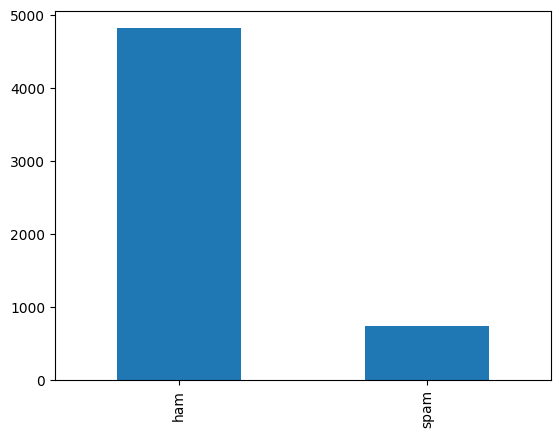

<Figure size 10x10 with 0 Axes>

In [8]:
# Step 1 : Visualizing the dataset

df['label'].value_counts().plot(kind='bar')
plt.figure(figsize=(0.1, 0.1))

In [9]:
#Converting text to lowercase
text= df['text'].str.lower()

In [10]:
#Downloading necessary packages
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Step 3: Tokenize the text into sentences
df['sentences'] = df['text'].apply(nltk.sent_tokenize)

In [12]:
df['sentences']

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: sentences, Length: 5572, dtype: object

In [13]:
#Tokenize the sentences into words
df['words']= df['sentences'].apply(lambda x: [word_tokenize(sentence) for sentence in x])

In [14]:
df['words']

0       [[Go, until, jurong, point, ,, crazy, ..], [Av...
1            [[Ok, lar, ...], [Joking, wif, u, oni, ...]]
2       [[Free, entry, in, 2, a, wkly, comp, to, win, ...
3       [[U, dun, say, so, early, hor, ..., U, c, alre...
4       [[Nah, I, do, n't, think, he, goes, to, usf, ,...
                              ...                        
5567    [[This, is, the, 2nd, time, we, have, tried, 2...
5568    [[Will, Ì_, b, going, to, esplanade, fr, home,...
5569    [[Pity, ,, *, was, in, mood, for, that, .], [S...
5570    [[The, guy, did, some, bitching, but, I, acted...
5571              [[Rofl, .], [Its, true, to, its, name]]
Name: words, Length: 5572, dtype: object

In [15]:
#Filter out punctuation and non-alphabetic words
df['filtered_words'] = df['words'].apply(lambda x: [[word for word in tokens if word.isalpha() and not all(char in string.punctuation for char in word)] for tokens in x])

In [16]:
#Perform POS tagging
df['tagged_words'] = df['filtered_words'].apply(lambda x: [pos_tag(tokens) for tokens in x])

In [17]:
#Filter out stopwords,punctuation and non-alphabetic words
stop_words = set(stopwords.words('english'))
df['filtered_words'] = df['tagged_words'].apply(lambda x: [[word for word, tag in tokens if word.isalpha() and not all(char in string.punctuation for char in word)] for tokens in x])

In [18]:
#Perform stemming(currently not applied)
stemmer = PorterStemmer()
df['stemmed_words']= df['filtered_words'].apply(lambda x: [[stemmer.stem(word) for word in words] for words in x])

In [19]:
#Perform lemmatization(currently not applied)
lemmatizer = WordNetLemmatizer()
df['lemmatized_words'] = df['filtered_words'].apply(lambda x: [[lemmatizer.lemmatize(word) for word in words] for words in x])

In [20]:
#Join the processed words back into sentences
df['processed_sentences']= df['filtered_words'].apply(lambda x: [' '.join(tokens) for tokens in x])

In [21]:
#Join the processed sentences back into a document
df['processed_text'] = df['processed_sentences'].apply(lambda x: ' '.join(x))

In [22]:
#Print the final processed text
df['processed_text']

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in a wkly comp to win FA Cup final ...
3             U dun say so early hor U c already then say
4       Nah I do think he goes to usf he lives around ...
                              ...                        
5567    This is the time we have tried contact U have ...
5568                    Will b going to esplanade fr home
5569    Pity was in mood for that So any other suggest...
5570    The guy did some bitching but I acted like i b...
5571                            Rofl Its true to its name
Name: processed_text, Length: 5572, dtype: object

In [23]:
#Define input messages (X) and target variable (y)
X=df['processed_text']
y=df['label']

In [24]:
#Converting text to vectorized form
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=2500, min_df=5, max_df=0.7, stop_words=None)
#X = vectorizer.fit_transform(df['text'])
X = vectorizer.fit_transform(df['processed_text'])
print(vectorizer.vocabulary_)
print(X.toarray())

{'go': 543, 'until': 1468, 'point': 1050, 'crazy': 297, 'available': 96, 'only': 971, 'in': 660, 'bugis': 176, 'great': 556, 'world': 1593, 'la': 725, 'cine': 242, 'there': 1374, 'got': 554, 'wat': 1519, 'ok': 960, 'lar': 732, 'joking': 700, 'wif': 1559, 'free': 499, 'entry': 421, 'wkly': 1577, 'comp': 266, 'to': 1406, 'win': 1564, 'cup': 304, 'final': 472, 'may': 829, 'text': 1358, 'receive': 1112, 'question': 1084, 'std': 1298, 'txt': 1450, 'rate': 1095, 'apply': 69, 'dun': 389, 'say': 1172, 'so': 1256, 'early': 395, 'already': 43, 'then': 1373, 'nah': 909, 'do': 360, 'think': 1379, 'he': 589, 'goes': 545, 'usf': 1479, 'around': 78, 'here': 600, 'though': 1388, 'freemsg': 500, 'hey': 601, 'darling': 318, 'it': 683, 'been': 127, 'week': 1532, 'now': 942, 'and': 54, 'no': 931, 'word': 1587, 'back': 108, 'like': 763, 'some': 1260, 'fun': 515, 'you': 1628, 'up': 1469, 'for': 491, 'still': 1299, 'xxx': 1608, 'send': 1198, 'even': 425, 'my': 906, 'brother': 170, 'is': 679, 'not': 939, 'spe

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [26]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [27]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.19594841],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
#Transform the feature matrix back into sentences
sentences = vectorizer.inverse_transform(X_train)

#Iterate over the sentences and print them
for sentence in sentences:
    print(' '.join(sentence))

Streaming output truncated to the last 5000 lines.
at be check do from half just me mind ok oops picking sorry station that to tomo up would you
im off pissed pretty whatever
are at now right work you
ah okay wait we
and bslvyl but day die end have hurt in keep life make me miss my nice of on one plz rose say stupid the when
plan same then trip wana
about always drug dude he is or party the to wants which who with worse
actually and better ca call could cuz did do even everything for fucking gas get give got have home man money more my need no not nothing on own pay rent tell than the them to up want work yes you yourself
been hair has not the
early it lar nite ok sleep too
are better feel gud mrng only than the when words you your
amount broke but even gt is lt no oh really small too
and been bought do for hiya how kind last little meet more myself na naughty night of ready shopping tho time very wan was what you
can know let me no not now problem said when you
aight back text when yo

In [29]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
#Transform the feature matrix back into sentences
sentences = vectorizer.inverse_transform(X_test)

In [31]:
output_sentences = []

#Iterate over the sentences and store them in the array
for sentence in sentences:
    s = ' '.join(sentence)
    output_sentences.append(s)

#Print the array
print(output_sentences)

['aight come just later plan should to tonight up', 'open the was', 'also and are contact cost do expensive few for had her if is joke less me my of on one ones school sent the think thinking to you', 'and congrats dear leaving message plans school see so that to ur was wat what when', 'at campus case guess in see that you', 'and be but do easy ever for life looking love not nothing on reason take to will', 'can free give if otherwise you', 'at be coffee drink hey late need or tea to will', 'are for going gym hey lesson or the we', 'free real reply ringtone', 'bad because but good lot not of people the world', 'almost babe forgot happy hey love ya', 'alone feel here so were wish', 'free get latest mobile news on plus sport the to tone txt ur wk', 'it lmao need when where your', 'brand is it oh which', 'bt direct dogging get join laid locations mob network nt real sent the to tonight txting uk ur want', 'all am forward looking more only sex the to two', 'acc are enough no to want what y

DECISION TREE

In [32]:
#Train the Decision Tree model
from sklearn import tree
#choose from different tunable hyper parameters
classifier = tree.DecisionTreeClassifier(max_depth=30,criterion='gini')

#Printing all the parameters of Decision Trees
print(classifier)

DecisionTreeClassifier(max_depth=30)


In [33]:
#Fitting the model on Training Data
DTree=classifier.fit(X_train,y_train)

In [34]:
#Make predictions on the testing data
y_pred_DT=DTree.predict(X_test)

In [35]:
#Evaluating the model to test accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_DT))
print(classification_report(y_test,y_pred_DT))
print(accuracy_score(y_test, y_pred_DT))

[[236   5]
 [  7  31]]
              precision    recall  f1-score   support

         ham       0.97      0.98      0.98       241
        spam       0.86      0.82      0.84        38

    accuracy                           0.96       279
   macro avg       0.92      0.90      0.91       279
weighted avg       0.96      0.96      0.96       279

0.956989247311828


RANDOM FOREST

In [36]:
#Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=20)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=20)

In [37]:
#Make predictions on the testing data
y_pred_RF = classifier.predict(X_test)

In [38]:
#Evaluating the model to test accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_RF))
print(classification_report(y_test,y_pred_RF))
print(accuracy_score(y_test, y_pred_RF))

[[241   0]
 [  6  32]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       241
        spam       1.00      0.84      0.91        38

    accuracy                           0.98       279
   macro avg       0.99      0.92      0.95       279
weighted avg       0.98      0.98      0.98       279

0.978494623655914


NAIVE BAYES'

In [39]:
# Train the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB(alpha=1, fit_prior=True)
naive_bayes.fit(X_train, y_train)

MultinomialNB(alpha=1)

In [40]:
# Make predictions on the testing data
y_pred_Naive = naive_bayes.predict(X_test)

In [41]:
#Evaluating the model to test accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_Naive))
print(classification_report(y_test,y_pred_Naive))
print(accuracy_score(y_test, y_pred_Naive))

[[241   0]
 [  8  30]]
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       241
        spam       1.00      0.79      0.88        38

    accuracy                           0.97       279
   macro avg       0.98      0.89      0.93       279
weighted avg       0.97      0.97      0.97       279

0.9713261648745519


SUPPORT VECTOR CLASSIFIER

In [42]:
from sklearn.svm import SVC
#Create an SVC classifier with modified hyperparameters
clf = SVC(C=100.0, kernel='rbf', gamma='scale')

In [43]:
#Fitting x samples and y classes
clf.fit(X_train, y_train)

SVC(C=100.0)

In [44]:
#Make predictions on the testing data
y_pred_svc = clf.predict(X_test)

In [45]:
#Evaluating the model to test accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
print(accuracy_score(y_test, y_pred_svc))

[[241   0]
 [  4  34]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       241
        spam       1.00      0.89      0.94        38

    accuracy                           0.99       279
   macro avg       0.99      0.95      0.97       279
weighted avg       0.99      0.99      0.99       279

0.985663082437276


Choosing SUPPORT VECTOR CLASSIFIER MODEL AS THE BEST, showing the predicted and actual labels

In [46]:
data = {'X_test': output_sentences, 'y_pred': y_pred_RF, 'y_test': y_test}
df_new = pd.DataFrame(data)

In [47]:
df_new.sample(100)

,X_test,y_pred,y_test
5216,am at be late there will,ham,ham
2426,and day go in now of on our over partner quiz ...,spam,spam
2550,advice and come here kind my please sen try,ham,ham
3261,are bus the you,ham,ham
1536,even feel how it just mr my not play real tho ...,ham,ham
...,...,...,...
3171,and could do have still we,ham,ham
2752,okay right sat thanks,ham,ham
5136,are cinema here is near nice or some the there,ham,ham
3663,also can how huh many not only then,ham,ham


In [48]:
df_new.reset_index(inplace=True)

In [49]:
df_new.head(10)

,index,X_test,y_pred,y_test
0,4456,aight come just later plan should to tonight up,ham,ham
1,690,open the was,ham,ham
2,944,also and are contact cost do expensive few for...,ham,ham
3,3768,and congrats dear leaving message plans school...,ham,ham
4,1189,at campus case guess in see that you,ham,ham
5,4437,and be but do easy ever for life looking love ...,ham,ham
6,3587,can free give if otherwise you,ham,ham
7,1982,at be coffee drink hey late need or tea to will,ham,ham
8,2038,are for going gym hey lesson or the we,ham,ham
9,2078,free real reply ringtone,spam,spam
